In [1]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()

In [2]:
# The data comes from https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
actors = spark.read.csv('name.basics.tsv', sep=r'\t', header=True)
genres = spark.read.csv('title.basics.tsv', sep=r'\t', header=True)
movie_actors = spark.read.csv('title.principals.tsv', sep=r'\t', header=True)
movie_ratings = spark.read.csv('title.ratings.tsv', sep=r'\t', header=True)

# Content

**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.
<br/><br/>
**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.

# Actors

In [3]:
actors.printSchema()
actors.show(10)
actors.count()

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

+---------+---------------+---------+---------+--------------------+--------------------+
|   nconst|    primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+---------------+---------+---------+--------------------+--------------------+
|nm0000001|   Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0050419,tt00531...|
|nm0000002|  Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0071877,tt01170...|
|nm0000003|Brigitte Bardot|     1934|       \N|actress,soundtrac...|tt0054452,tt00491...|
|nm0000004|   John Belushi|     1949|     1982|actor,writer,soun...|tt0077975,tt00725...|
|nm0000005| Ingmar Bergman|     1918|     2007|writer,director,a...|tt0069467,tt00509...|
|nm0000006| Ingr

9706922

# Genres

In [4]:
genres.printSchema()
genres.show(2)
genres.count()

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+-----------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|           genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+-----------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|  Animation,Short|
+-------

6321302

In [5]:
genres.select("primaryTitle", "startYear", "runtimeMinutes", "genres").show(2)

+--------------------+---------+--------------+-----------------+
|        primaryTitle|startYear|runtimeMinutes|           genres|
+--------------------+---------+--------------+-----------------+
|          Carmencita|     1894|             1|Documentary,Short|
|Le clown et ses c...|     1892|             5|  Animation,Short|
+--------------------+---------+--------------+-----------------+
only showing top 2 rows



In [6]:
from pyspark.sql.functions import col
genres.select("primaryTitle", "startYear", "runtimeMinutes", "genres").sort(col("startYear").desc()).show(20)

+--------------------+---------+--------------+---------------+
|        primaryTitle|startYear|runtimeMinutes|         genres|
+--------------------+---------+--------------+---------------+
|       Winding Stair|       \N|            \N|       Thriller|
|Kosztolányi Dezsö...|       \N|            25|          Short|
|     Artes e Ofícios|       \N|            \N|             \N|
|         Willi Forst|       \N|            55|             \N|
|          Megavision|       \N|            \N|         Comedy|
|Das Leben hinter ...|       \N|            \N|    Documentary|
|Ahol kialszik a v...|       \N|            15|Animation,Short|
|    Leben ohne Sonne|       \N|            \N|    Documentary|
|Alexandru Lapusneanu|       \N|            \N|        History|
|        Episode #1.2|       \N|            81|  Drama,History|
|            Complica|       \N|            \N|             \N|
|  The Arcata Promise|       \N|            \N|          Music|
|         Cuo zai cuo|       \N|        

In [7]:
from pyspark.sql.functions import col
nll = '\\N'
genres.select("primaryTitle", "startYear", "runtimeMinutes", "genres") \
    .filter(col("startYear") != nll) \
    .sort(col("startYear").desc()).show(20)

+--------------------+---------+--------------+--------------------+
|        primaryTitle|startYear|runtimeMinutes|              genres|
+--------------------+---------+--------------+--------------------+
|           100 Years|     2115|            \N|               Drama|
|            Avatar 5|     2027|            \N|Action,Adventure,...|
|          Persephone|     2026|            \N|             Fantasy|
|     Greenoaks Drive|     2026|            \N|               Drama|
|Untitled Star War...|     2026|            \N|Action,Adventure,...|
|Alien Interloper:...|     2026|            \N|           Animation|
|            Avatar 4|     2025|            \N|Action,Adventure,...|
|               Frame|     2025|            \N|         Documentary|
|Ghost Hollow: Ano...|     2025|            \N|        Horror,Short|
| Blood Red Christmas|     2025|            \N|              Horror|
|            The Race|     2024|            \N|               Drama|
|              Anna Q|     2024|  

# Movie Actors

In [8]:
movie_actors.printSchema()
movie_actors.show(2)
movie_actors.count()

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

+---------+--------+---------+--------+---+-----------+
|   tconst|ordering|   nconst|category|job| characters|
+---------+--------+---------+--------+---+-----------+
|tt0000001|       1|nm1588970|    self| \N|["Herself"]|
|tt0000001|       2|nm0005690|director| \N|         \N|
+---------+--------+---------+--------+---+-----------+
only showing top 2 rows



36468817

# Movie Ratings

In [9]:
movie_ratings.printSchema()
movie_ratings.show(2)
movie_ratings.count()

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.6|    1550|
|tt0000002|          6.1|     186|
+---------+-------------+--------+
only showing top 2 rows



993153

In [10]:
movie_ratings.select("tconst", "averageRating").sort(col("averageRating").desc()).show(20)

+---------+-------------+
|   tconst|averageRating|
+---------+-------------+
|tt0398053|          9.9|
|tt0772824|          9.9|
|tt0398054|          9.9|
|tt0264420|          9.9|
|tt0447836|          9.9|
|tt0307114|          9.9|
|tt0487487|          9.9|
|tt0343717|          9.9|
|tt0500029|          9.9|
|tt0620994|          9.9|
|tt0621905|          9.9|
|tt0223767|          9.9|
|tt0626832|          9.9|
|tt0342595|          9.9|
|tt0646493|          9.9|
|tt0509378|          9.9|
|tt0647375|          9.9|
|tt0536615|          9.9|
|tt0696497|          9.9|
|tt0594781|          9.9|
+---------+-------------+
only showing top 20 rows



# Install the libraries

In [ ]:
#This for the cloud purpose
spark.install_pypi_package("matplotlib==3.2.1")
spark.install_pypi_package("pandas==1.0.3")
#sc.install_pypi_package("seaborn==0.11.2")

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# What are the 10 most popular genres in this data set?

In [12]:
genres_only = genres.select("tconst", "genres")
movie_ratings_only = movie_ratings.select("tconst", "averageRating")
genres_ratings = genres_only.join(movie_ratings_only, genres_only.tconst == movie_ratings_only.tconst)
genres_ratings.show(10)

+---------+-----------------+---------+-------------+
|   tconst|           genres|   tconst|averageRating|
+---------+-----------------+---------+-------------+
|tt0000658|  Animation,Short|tt0000658|          6.4|
|tt0001732|      Drama,Short|tt0001732|          7.1|
|tt0002253|      Drama,Short|tt0002253|          4.2|
|tt0002473|    Romance,Short|tt0002473|          6.7|
|tt0002588|            Short|tt0002588|          6.2|
|tt0004091|     Comedy,Short|tt0004091|          5.1|
|tt0004272|           Action|tt0004272|          5.9|
|tt0004336|Adventure,Mystery|tt0004336|          5.5|
|tt0005209|            Drama|tt0005209|          5.7|
|tt0006204|            Drama|tt0006204|          6.1|
+---------+-----------------+---------+-------------+
only showing top 10 rows



In [13]:
#split genres column with split which generates two rows for each row.

from pyspark.sql.functions import explode, split
genres_ratings_exploded = genres_ratings.withColumn('genre',explode(split('genres',",")))
genres_ratings_exploded.show(6)

+---------+---------------+---------+-------------+---------+
|   tconst|         genres|   tconst|averageRating|    genre|
+---------+---------------+---------+-------------+---------+
|tt0000658|Animation,Short|tt0000658|          6.4|Animation|
|tt0000658|Animation,Short|tt0000658|          6.4|    Short|
|tt0001732|    Drama,Short|tt0001732|          7.1|    Drama|
|tt0001732|    Drama,Short|tt0001732|          7.1|    Short|
|tt0002253|    Drama,Short|tt0002253|          4.2|    Drama|
|tt0002253|    Drama,Short|tt0002253|          4.2|    Short|
+---------+---------------+---------+-------------+---------+
only showing top 6 rows



In [14]:
from pyspark.sql.functions import col, mean
most_pop_genres = genres_ratings_exploded \
    .select("genre", "averageRating") \
    .withColumn("averageRating", col("averageRating").cast("Integer")) \
    .groupBy("genre") \
    .agg(mean('averageRating').alias("avg_rating")) \
    .sort(col("avg_rating").desc())

In [15]:
most_pop_genres.show(10)

+-----------+------------------+
|      genre|        avg_rating|
+-----------+------------------+
|    History| 6.860530277684845|
|Documentary| 6.798347422394679|
|    Mystery| 6.770626436653351|
|  Biography| 6.739426872404778|
|      Crime|6.7220388851337916|
|    Western| 6.668041844703109|
|    Fantasy| 6.651158055484856|
|  Adventure|   6.6145401366268|
|  Animation|   6.6064269658764|
|        War| 6.580607891930324|
+-----------+------------------+
only showing top 10 rows



# Which genres are most popular in terms of most movies made?

In [16]:
#count it through groupby

genres_grouped = genres_ratings_exploded.groupby('genre')
genres_grouped.count().show()

Py4JJavaError: An error occurred while calling o148.showString.
: org.apache.spark.sql.catalyst.errors.package$TreeNodeException: execute, tree:
Exchange hashpartitioning(genre#402, 200), ENSURE_REQUIREMENTS, [id=#473]
+- *(3) HashAggregate(keys=[genre#402], functions=[partial_count(1)], output=[genre#402, count#477L])
   +- Generate explode(split(genres#52, ,, -1)), false, [genre#402]
      +- *(2) Project [genres#52]
         +- *(2) BroadcastHashJoin [tconst#44], [tconst#106], Inner, BuildRight, false
            :- *(2) Filter (((isnotnull(tconst#44) AND isnotnull(genres#52)) AND (size(split(genres#52, ,, -1), true) > 0)) AND isnotnull(split(genres#52, ,, -1)))
            :  +- FileScan csv [tconst#44,genres#52] Batched: false, DataFilters: [isnotnull(tconst#44), isnotnull(genres#52), (size(split(genres#52, ,, -1), true) > 0), isnotnull..., Format: CSV, Location: InMemoryFileIndex[file:/C:/Users/hlee0/CIS 9760/title.basics.tsv], PartitionFilters: [], PushedFilters: [IsNotNull(tconst), IsNotNull(genres)], ReadSchema: struct<tconst:string,genres:string>
            +- BroadcastExchange HashedRelationBroadcastMode(List(input[0, string, false]),false), [id=#464]
               +- *(1) Filter isnotnull(tconst#106)
                  +- FileScan csv [tconst#106] Batched: false, DataFilters: [isnotnull(tconst#106)], Format: CSV, Location: InMemoryFileIndex[file:/C:/Users/hlee0/CIS 9760/title.ratings.tsv], PartitionFilters: [], PushedFilters: [IsNotNull(tconst)], ReadSchema: struct<tconst:string>

	at org.apache.spark.sql.catalyst.errors.package$.attachTree(package.scala:56)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.doExecute(ShuffleExchangeExec.scala:163)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.InputAdapter.inputRDD(WholeStageCodegenExec.scala:525)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs(WholeStageCodegenExec.scala:453)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs$(WholeStageCodegenExec.scala:452)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:496)
	at org.apache.spark.sql.execution.aggregate.HashAggregateExec.inputRDDs(HashAggregateExec.scala:141)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:746)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:321)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:439)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:425)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:47)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3696)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2929)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:301)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:338)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.util.concurrent.ExecutionException: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 30.0 failed 1 times, most recent failure: Lost task 0.0 in stage 30.0 (TID 468) (DESKTOP-TCBMIMP.fios-router.home executor driver): TaskResultLost (result lost from block manager)
Driver stacktrace:
	at java.base/java.util.concurrent.FutureTask.report(FutureTask.java:122)
	at java.base/java.util.concurrent.FutureTask.get(FutureTask.java:205)
	at org.apache.spark.sql.execution.exchange.BroadcastExchangeExec.doExecuteBroadcast(BroadcastExchangeExec.scala:194)
	at org.apache.spark.sql.execution.InputAdapter.doExecuteBroadcast(WholeStageCodegenExec.scala:515)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeBroadcast$1(SparkPlan.scala:193)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.executeBroadcast(SparkPlan.scala:189)
	at org.apache.spark.sql.execution.joins.BroadcastHashJoinExec.prepareBroadcast(BroadcastHashJoinExec.scala:203)
	at org.apache.spark.sql.execution.joins.BroadcastHashJoinExec.prepareRelation(BroadcastHashJoinExec.scala:217)
	at org.apache.spark.sql.execution.joins.HashJoin.codegenInner(HashJoin.scala:449)
	at org.apache.spark.sql.execution.joins.HashJoin.codegenInner$(HashJoin.scala:448)
	at org.apache.spark.sql.execution.joins.BroadcastHashJoinExec.codegenInner(BroadcastHashJoinExec.scala:40)
	at org.apache.spark.sql.execution.joins.HashJoin.doConsume(HashJoin.scala:357)
	at org.apache.spark.sql.execution.joins.HashJoin.doConsume$(HashJoin.scala:355)
	at org.apache.spark.sql.execution.joins.BroadcastHashJoinExec.doConsume(BroadcastHashJoinExec.scala:40)
	at org.apache.spark.sql.execution.CodegenSupport.consume(WholeStageCodegenExec.scala:194)
	at org.apache.spark.sql.execution.CodegenSupport.consume$(WholeStageCodegenExec.scala:149)
	at org.apache.spark.sql.execution.FilterExec.consume(basicPhysicalOperators.scala:113)
	at org.apache.spark.sql.execution.FilterExec.doConsume(basicPhysicalOperators.scala:238)
	at org.apache.spark.sql.execution.CodegenSupport.consume(WholeStageCodegenExec.scala:194)
	at org.apache.spark.sql.execution.CodegenSupport.consume$(WholeStageCodegenExec.scala:149)
	at org.apache.spark.sql.execution.InputAdapter.consume(WholeStageCodegenExec.scala:496)
	at org.apache.spark.sql.execution.InputRDDCodegen.doProduce(WholeStageCodegenExec.scala:483)
	at org.apache.spark.sql.execution.InputRDDCodegen.doProduce$(WholeStageCodegenExec.scala:456)
	at org.apache.spark.sql.execution.InputAdapter.doProduce(WholeStageCodegenExec.scala:496)
	at org.apache.spark.sql.execution.CodegenSupport.$anonfun$produce$1(WholeStageCodegenExec.scala:95)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.CodegenSupport.produce(WholeStageCodegenExec.scala:90)
	at org.apache.spark.sql.execution.CodegenSupport.produce$(WholeStageCodegenExec.scala:90)
	at org.apache.spark.sql.execution.InputAdapter.produce(WholeStageCodegenExec.scala:496)
	at org.apache.spark.sql.execution.FilterExec.doProduce(basicPhysicalOperators.scala:153)
	at org.apache.spark.sql.execution.CodegenSupport.$anonfun$produce$1(WholeStageCodegenExec.scala:95)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.CodegenSupport.produce(WholeStageCodegenExec.scala:90)
	at org.apache.spark.sql.execution.CodegenSupport.produce$(WholeStageCodegenExec.scala:90)
	at org.apache.spark.sql.execution.FilterExec.produce(basicPhysicalOperators.scala:113)
	at org.apache.spark.sql.execution.joins.HashJoin.doProduce(HashJoin.scala:352)
	at org.apache.spark.sql.execution.joins.HashJoin.doProduce$(HashJoin.scala:351)
	at org.apache.spark.sql.execution.joins.BroadcastHashJoinExec.doProduce(BroadcastHashJoinExec.scala:40)
	at org.apache.spark.sql.execution.CodegenSupport.$anonfun$produce$1(WholeStageCodegenExec.scala:95)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.CodegenSupport.produce(WholeStageCodegenExec.scala:90)
	at org.apache.spark.sql.execution.CodegenSupport.produce$(WholeStageCodegenExec.scala:90)
	at org.apache.spark.sql.execution.joins.BroadcastHashJoinExec.produce(BroadcastHashJoinExec.scala:40)
	at org.apache.spark.sql.execution.ProjectExec.doProduce(basicPhysicalOperators.scala:54)
	at org.apache.spark.sql.execution.CodegenSupport.$anonfun$produce$1(WholeStageCodegenExec.scala:95)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.CodegenSupport.produce(WholeStageCodegenExec.scala:90)
	at org.apache.spark.sql.execution.CodegenSupport.produce$(WholeStageCodegenExec.scala:90)
	at org.apache.spark.sql.execution.ProjectExec.produce(basicPhysicalOperators.scala:41)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doCodeGen(WholeStageCodegenExec.scala:655)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:718)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.GenerateExec.doExecute(GenerateExec.scala:80)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.InputAdapter.inputRDD(WholeStageCodegenExec.scala:525)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs(WholeStageCodegenExec.scala:453)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs$(WholeStageCodegenExec.scala:452)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:496)
	at org.apache.spark.sql.execution.aggregate.HashAggregateExec.inputRDDs(HashAggregateExec.scala:141)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:746)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.inputRDD$lzycompute(ShuffleExchangeExec.scala:118)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.inputRDD(ShuffleExchangeExec.scala:118)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency$lzycompute(ShuffleExchangeExec.scala:151)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency(ShuffleExchangeExec.scala:149)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.$anonfun$doExecute$1(ShuffleExchangeExec.scala:166)
	at org.apache.spark.sql.catalyst.errors.package$.attachTree(package.scala:52)
	... 45 more
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 30.0 failed 1 times, most recent failure: Lost task 0.0 in stage 30.0 (TID 468) (DESKTOP-TCBMIMP.fios-router.home executor driver): TaskResultLost (result lost from block manager)
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2261)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.sql.execution.SparkPlan.executeCollectIterator(SparkPlan.scala:397)
	at org.apache.spark.sql.execution.exchange.BroadcastExchangeExec.$anonfun$relationFuture$1(BroadcastExchangeExec.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withThreadLocalCaptured$1(SQLExecution.scala:185)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [17]:
barchart_df = genres_grouped.count().orderBy('count',ascending=False)
barchart_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|      genre| count|
+-----------+------+
|      Drama|324657|
|     Comedy|315965|
|      Short|129929|
|Documentary|115456|
|     Action|115257|
|  Animation|108107|
|      Crime|100604|
|  Adventure| 99834|
|     Family| 75686|
|    Romance| 72017|
|      Music| 46257|
|    Mystery| 44809|
| Reality-TV| 44678|
|     Horror| 41331|
|   Thriller| 39768|
|    Fantasy| 39290|
|  Talk-Show| 32371|
|     Sci-Fi| 28657|
|    History| 23912|
|         \N| 20877|
+-----------+------+
only showing top 20 rows

In [18]:
pdf = barchart_df.toPandas()
pdf

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          genre   count
0         Drama  324657
1        Comedy  315965
2         Short  129929
3   Documentary  115456
4        Action  115257
5     Animation  108107
6         Crime  100604
7     Adventure   99834
8        Family   75686
9       Romance   72017
10        Music   46257
11      Mystery   44809
12   Reality-TV   44678
13       Horror   41331
14     Thriller   39768
15      Fantasy   39290
16    Talk-Show   32371
17       Sci-Fi   28657
18      History   23912
19           \N   20877
20    Game-Show   19789
21    Biography   19507
22        Adult   17586
23        Sport   16173
24         News   13672
25      Western   13574
26          War   11252
27      Musical   10506
28    Film-Noir     778

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

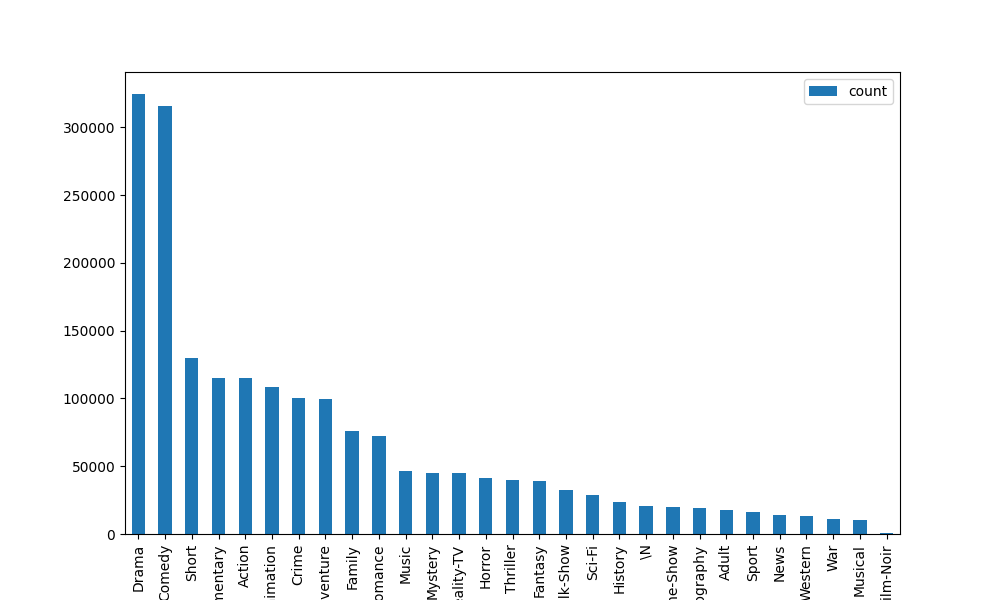

In [19]:
plt.figure(figsize =(10,6))
pdf.plot(kind='bar', x='genre', figsize=(10,6))
%matplot plt

In [20]:
'''
ax = sns.factorplot(x="genre", y="count", data=pdf,size=4, aspect=2, kind="bar")
for axes in ax.axes.flat:
 axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')
plt.tight_layout()
plt.show()
%matplot plt
'''

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'\nax = sns.factorplot(x="genre", y="count", data=pdf,size=4, aspect=2, kind="bar")\nfor axes in ax.axes.flat:\n axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment=\'right\')\nplt.tight_layout()\nplt.show()\n%matplot plt\n'

# Find the total number of people who were born in 1980 and whose primary profession is soundtrack

In [18]:
from pyspark.sql.functions import split, col
actors.withColumn('primaryProfession',explode(split('primaryProfession',","))) \
    .filter((actors.primaryProfession == "soundtrack") & (actors.birthYear == '1980')) \
    .count()

41

# What year is the movie "Dead Poets Society" from?

In [19]:
genres.select("startYear") \
    .filter(genres.primaryTitle == "Dead Poets Society") \
    .show()

+---------+
|startYear|
+---------+
|     1989|
|     2019|
|     2014|
+---------+



In [20]:
## Oops! Three startYear? Doesn't make sense. Let's look at the data
genres.filter(genres.primaryTitle == "Dead Poets Society") \
    .show()

+----------+---------+------------------+------------------+-------+---------+-------+--------------+------------+
|    tconst|titleType|      primaryTitle|     originalTitle|isAdult|startYear|endYear|runtimeMinutes|      genres|
+----------+---------+------------------+------------------+-------+---------+-------+--------------+------------+
| tt0097165|    movie|Dead Poets Society|Dead Poets Society|      0|     1989|     \N|           128|Comedy,Drama|
|tt10545570|tvEpisode|Dead Poets Society|Dead Poets Society|      0|     2019|     \N|            \N|   Talk-Show|
| tt9037200|tvEpisode|Dead Poets Society|Dead Poets Society|      0|     2014|     \N|            \N|       Music|
+----------+---------+------------------+------------------+-------+---------+-------+--------------+------------+



In [21]:
# Seems that there are tv episodes named the same
# Let's do an additional filtering
tmp=genres.select("primaryTitle", "startYear") \
    .filter((genres.primaryTitle == "Dead Poets Society") & (genres.titleType == "movie"))
tmp.show()
tmp.count()

+------------------+---------+
|      primaryTitle|startYear|
+------------------+---------+
|Dead Poets Society|     1989|
+------------------+---------+



1

# Find all the movies featuring "Scarlett Johansson" and "Chris Evans" (2 points)

In [17]:
xxx = actors.filter((actors.primaryName == "Scarlett Johansson"))
yyy= actors.filter(actors.primaryName == "Chris Evans")
xxx.show()
xxx.count()
 
#find Scarlett and Chris from dataset

+---------+------------------+---------+---------+--------------------+--------------------+
|   nconst|       primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+------------------+---------+---------+--------------------+--------------------+
|nm0424060|Scarlett Johansson|     1984|       \N|actress,soundtrac...|tt1798709,tt03352...|
+---------+------------------+---------+---------+--------------------+--------------------+



1

In [18]:
#ttt = actors.filter((actors.primaryName == "Scarlett Johansson" & actors.birthYear == "1984") | (actors.primaryName == "Chris Evans" & actors.birthYear == "1981"))
#ttt.show()
#ttt.count()

In [19]:
yyy.show()
yyy.count()

+----------+-----------+---------+---------+--------------------+--------------------+
|    nconst|primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+----------+-----------+---------+---------+--------------------+--------------------+
| nm0262632|Chris Evans|     1966|       \N|producer,actor,wr...|tt0243714,tt01087...|
| nm0262633|Chris Evans|       \N|       \N|               actor|           tt0100774|
| nm0262634|Chris Evans|       \N|       \N|  make_up_department| tt0085852,tt0088553|
| nm0262635|Chris Evans|     1981|       \N|actor,producer,so...|tt1843866,tt04583...|
|nm10022496|Chris Evans|       \N|       \N|     cinematographer|           tt1582471|
|nm10048300|Chris Evans|       \N|       \N|                null|           tt1631912|
| nm1012859|Chris Evans|       \N|       \N|  production_manager|tt0073447,tt72255...|
|nm10176455|Chris Evans|       \N|       \N|                null|           tt8064252|
|nm10201661|Chris Evans|       \N|       \N

100

In [20]:
#find movies that has Scarlett Johansson
movie_info = movie_actors.select("tconst", "nconst")
scarlett_info = xxx.select("nconst", "primaryName")
movie_with_scarlett = movie_info.join(scarlett_info, movie_info.nconst == scarlett_info.nconst, "inner").drop(movie_info.nconst)
movie_with_scarlett.show(10)
movie_with_scarlett.count()

+---------+---------+------------------+
|   tconst|   nconst|       primaryName|
+---------+---------+------------------+
|tt0116985|nm0424060|Scarlett Johansson|
|tt0162346|nm0424060|Scarlett Johansson|
|tt0165396|nm0424060|Scarlett Johansson|
|tt0221799|nm0424060|Scarlett Johansson|
|tt0271367|nm0424060|Scarlett Johansson|
|tt0314498|nm0424060|Scarlett Johansson|
|tt0335119|nm0424060|Scarlett Johansson|
|tt0335266|nm0424060|Scarlett Johansson|
|tt0369672|nm0424060|Scarlett Johansson|
|tt0373121|nm0424060|Scarlett Johansson|
+---------+---------+------------------+
only showing top 10 rows



221

In [24]:
#find movies that has Chris Evans
movie_info = movie_actors.select("tconst", "nconst")
chris_info = yyy.select("nconst", "primaryName")
movie_with_chris = movie_info.join(chris_info, movie_info.nconst == chris_info.nconst, "inner").drop(movie_info.nconst)
movie_with_chris.show(10)
movie_with_chris.count()

+----------+---------+-----------+
|    tconst|   nconst|primaryName|
+----------+---------+-----------+
| tt2779964|nm5578926|Chris Evans|
|tt10234076|nm2873413|Chris Evans|
|tt10234104|nm2873413|Chris Evans|
|tt10234130|nm2873413|Chris Evans|
|tt10234176|nm2873413|Chris Evans|
|tt10234220|nm2873413|Chris Evans|
| tt2644722|nm2873413|Chris Evans|
| tt3835116|nm2873413|Chris Evans|
| tt3835124|nm2873413|Chris Evans|
| tt5895138|nm2873413|Chris Evans|
+----------+---------+-----------+
only showing top 10 rows



538

In [25]:
movie_with_both = movie_with_chris.join(movie_with_scarlett, movie_with_chris.tconst == movie_with_scarlett.tconst, "inner")\
.drop(movie_with_chris.tconst)

In [26]:
movie_with_both.show()
movie_with_both.count()
#wait why so many? some of them are not movies? (through professor's hint)

+---------+-----------+----------+---------+------------------+
|   nconst|primaryName|    tconst|   nconst|       primaryName|
+---------+-----------+----------+---------+------------------+
|nm0262635|Chris Evans| tt4380568|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans| tt3498820|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans| tt5484160|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans| tt0314498|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans| tt5226204|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans| tt5180254|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans| tt1843866|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans|tt10075836|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans| tt5181714|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans|tt10014292|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans| tt5505734|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans| tt5576506|nm0424060|Scarlett Johansson|
|nm0262635|Chris Evans| tt5180410|nm0424

18

In [27]:
genres1 = genres.select("tconst","primaryTitle","titleType") \
.filter(genres.titleType == "movie")
genres1.show()
genres1.count()

+---------+--------------------+---------+
|   tconst|        primaryTitle|titleType|
+---------+--------------------+---------+
|tt0000009|          Miss Jerry|    movie|
|tt0000147|The Corbett-Fitzs...|    movie|
|tt0000335|Soldiers of the C...|    movie|
|tt0000502|            Bohemios|    movie|
|tt0000574|The Story of the ...|    movie|
|tt0000615|  Robbery Under Arms|    movie|
|tt0000630|              Hamlet|    movie|
|tt0000675|         Don Quijote|    movie|
|tt0000676|Don Álvaro o la f...|    movie|
|tt0000679|The Fairylogue an...|    movie|
|tt0000739|El pastorcito de ...|    movie|
|tt0000793|       Andreas Hofer|    movie|
|tt0000812|   El blocao Velarde|    movie|
|tt0000814|La bocana de Mar ...|    movie|
|tt0000838|  A Cultura do Cacau|    movie|
|tt0000842|De Garraf a Barce...|    movie|
|tt0000846|Un día en Xochimilco|    movie|
|tt0000850|    Los dos hermanos|    movie|
|tt0000859|Fabricación del c...|    movie|
|tt0000862|          Faldgruben|    movie|
+---------+

536034

In [28]:
movie_with_name = genres1.join(movie_with_both, genres1.tconst == movie_with_both.tconst, "inner").drop(genres1.tconst)
movie_with_name.show()

+--------------------+---------+---------+-----------+----------+---------+------------------+
|        primaryTitle|titleType|   nconst|primaryName|    tconst|   nconst|       primaryName|
+--------------------+---------+---------+-----------+----------+---------+------------------+
|Captain America: ...|    movie|nm0262635|Chris Evans| tt3498820|nm0424060|Scarlett Johansson|
|   The Perfect Score|    movie|nm0262635|Chris Evans| tt0314498|nm0424060|Scarlett Johansson|
|Captain America: ...|    movie|nm0262635|Chris Evans| tt1843866|nm0424060|Scarlett Johansson|
|The Avengers Asse...|    movie|nm0262635|Chris Evans|tt10075836|nm0424060|Scarlett Johansson|
|        The Avengers|    movie|nm0262635|Chris Evans| tt0848228|nm0424060|Scarlett Johansson|
+--------------------+---------+---------+-----------+----------+---------+------------------+



In [29]:
Answer = movie_with_name.select("primaryTitle")
Answer.show()

+--------------------+
|        primaryTitle|
+--------------------+
|Captain America: ...|
|   The Perfect Score|
|Captain America: ...|
|The Avengers Asse...|
|        The Avengers|
+--------------------+



In [64]:
#result

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|primaryTitle|
+------------+
|The Avengers|
+------------+

# Find all the movies featuring "Brad Pitt" after 2010 (2 points)

In [30]:
bbb = actors.filter((actors.primaryName == "Brad Pitt"))
bbb.show()

+---------+-----------+---------+---------+--------------------+--------------------+
|   nconst|primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+-----------+---------+---------+--------------------+--------------------+
|nm0000093|  Brad Pitt|     1963|       \N|actor,producer,so...|tt0356910,tt08167...|
+---------+-----------+---------+---------+--------------------+--------------------+



In [82]:
#qqq= filter(lambda actors: (actors.primaryName == "Scarlett Johansson" and actors.birthYear == "1984") or ( actors.primaryName == "Chris Evans" or actors.birthYear == "1981"),actors)
#qqq

In [31]:
brad_join = bbb.join(movie_actors, bbb.nconst == movie_actors.nconst, "inner").drop(bbb.nconst)
brad_join.show()
brad_join.count()

+-----------+---------+---------+--------------------+--------------------+---------+--------+---------+--------+---+--------------------+
|primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|   tconst|ordering|   nconst|category|job|          characters|
+-----------+---------+---------+--------------------+--------------------+---------+--------+---------+--------+---+--------------------+
|  Brad Pitt|     1963|       \N|actor,producer,so...|tt0356910,tt08167...|tt0097136|       3|nm0000093|   actor| \N|  ["Dwight Ingalls"]|
|  Brad Pitt|     1963|       \N|actor,producer,so...|tt0356910,tt08167...|tt0098804|       2|nm0000093|   actor| \N|  ["Walker Lovejoy"]|
|  Brad Pitt|     1963|       \N|actor,producer,so...|tt0356910,tt08167...|tt0100797|       3|nm0000093|   actor| \N|    ["Billy Canton"]|
|  Brad Pitt|     1963|       \N|actor,producer,so...|tt0356910,tt08167...|tt0101268|       2|nm0000093|   actor| \N|     ["Joe Maloney"]|
|  Brad Pitt|     1963|    

302

In [32]:
brad_join2 = brad_join.select("primaryName", "tconst")
brad_join2.show()
brad_join2.count()

+-----------+---------+
|primaryName|   tconst|
+-----------+---------+
|  Brad Pitt|tt0097136|
|  Brad Pitt|tt0098804|
|  Brad Pitt|tt0100797|
|  Brad Pitt|tt0101268|
|  Brad Pitt|tt0104007|
|  Brad Pitt|tt0104009|
|  Brad Pitt|tt0104567|
|  Brad Pitt|tt0105265|
|  Brad Pitt|tt0107302|
|  Brad Pitt|tt0109783|
|  Brad Pitt|tt0110148|
|  Brad Pitt|tt0110322|
|  Brad Pitt|tt0114369|
|  Brad Pitt|tt0114746|
|  Brad Pitt|tt0117665|
|  Brad Pitt|tt0118930|
|  Brad Pitt|tt0118972|
|  Brad Pitt|tt0119643|
|  Brad Pitt|tt0120102|
|  Brad Pitt|tt0137523|
+-----------+---------+
only showing top 20 rows



302

In [33]:
genres_2 = genres.select("tconst","primaryTitle","startYear","titleType").filter(genres.titleType == "movie")
genres_2.show()

+---------+--------------------+---------+---------+
|   tconst|        primaryTitle|startYear|titleType|
+---------+--------------------+---------+---------+
|tt0000009|          Miss Jerry|     1894|    movie|
|tt0000147|The Corbett-Fitzs...|     1897|    movie|
|tt0000335|Soldiers of the C...|     1900|    movie|
|tt0000502|            Bohemios|     1905|    movie|
|tt0000574|The Story of the ...|     1906|    movie|
|tt0000615|  Robbery Under Arms|     1907|    movie|
|tt0000630|              Hamlet|     1908|    movie|
|tt0000675|         Don Quijote|     1908|    movie|
|tt0000676|Don Álvaro o la f...|     1908|    movie|
|tt0000679|The Fairylogue an...|     1908|    movie|
|tt0000739|El pastorcito de ...|     1908|    movie|
|tt0000793|       Andreas Hofer|     1909|    movie|
|tt0000812|   El blocao Velarde|     1909|    movie|
|tt0000814|La bocana de Mar ...|     1909|    movie|
|tt0000838|  A Cultura do Cacau|     1909|    movie|
|tt0000842|De Garraf a Barce...|     1909|    

In [34]:
brad_title = genres_2.join(brad_join2, genres_2.tconst == brad_join2.tconst, "inner").drop(genres_2.tconst)
brad_title.show()
brad_title.count()

+--------------------+---------+---------+-----------+---------+
|        primaryTitle|startYear|titleType|primaryName|   tconst|
+--------------------+---------+---------+-----------+---------+
|              Blonde|       \N|    movie|  Brad Pitt|tt1655389|
|Untitled Jerry Le...|       \N|    movie|  Brad Pitt|tt1726812|
|           The Jaunt|       \N|    movie|  Brad Pitt|tt4522740|
|       The Operators|       \N|    movie|  Brad Pitt|tt2388779|
|      Ocean's Eleven|     2001|    movie|  Brad Pitt|tt0240772|
|           Moneyball|     2011|    movie|  Brad Pitt|tt1210166|
|              Snatch|     2000|    movie|  Brad Pitt|tt0208092|
|       Cutting Class|     1989|    movie|  Brad Pitt|tt0097136|
|           Illuminae|       \N|    movie|  Brad Pitt|tt5216096|
|  Burn After Reading|     2008|    movie|  Brad Pitt|tt0887883|
|            Megamind|     2010|    movie|  Brad Pitt|tt1001526|
|               Babel|     2006|    movie|  Brad Pitt|tt0449467|
|               Alpha|   

88

In [35]:
#convert Year to type `int`
from pyspark.sql.functions import col

brad_title.printSchema()
brad_title2 = brad_title.withColumn("startYear", col("startYear").cast("Integer")).orderBy('startYear',ascending=False)

brad_title2.printSchema()
brad_title2.show()




root
 |-- primaryTitle: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- tconst: string (nullable = true)

root
 |-- primaryTitle: string (nullable = true)
 |-- startYear: integer (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- tconst: string (nullable = true)

+--------------------+---------+---------+-----------+----------+
|        primaryTitle|startYear|titleType|primaryName|    tconst|
+--------------------+---------+---------+-----------+----------+
|             Babylon|     2021|    movie|  Brad Pitt|tt10640346|
|        Irresistible|     2020|    movie|  Brad Pitt| tt9076562|
|       Kajillionaire|     2020|    movie|  Brad Pitt| tt8143990|
|            The King|     2019|    movie|  Brad Pitt| tt7984766|
|            Ad Astra|     2019|    movie|  Brad Pitt| tt2935510|
|Once Upon a Time ...|     2019|    movie|  B

In [39]:
# filter ultil 2010
from pyspark.sql.types import (
    StructType,
    StructField, 
    StringType, 
    IntegerType, 
    ArrayType,
)

vi = brad_title2.filter(col("startYear") >= 2011).orderBy('startYear',ascending=True)
vi.show()
vi.count()

+--------------------+---------+---------+-----------+----------+
|        primaryTitle|startYear|titleType|primaryName|    tconst|
+--------------------+---------+---------+-----------+----------+
|    The Tree of Life|     2011|    movie|  Brad Pitt| tt0478304|
|           Moneyball|     2011|    movie|  Brad Pitt| tt1210166|
| Killing Them Softly|     2012|    movie|  Brad Pitt| tt1764234|
|    12 Years a Slave|     2013|    movie|  Brad Pitt| tt2024544|
|          Kick-Ass 2|     2013|    movie|  Brad Pitt| tt1650554|
|         World War Z|     2013|    movie|  Brad Pitt| tt0816711|
|                Fury|     2014|    movie|  Brad Pitt| tt2713180|
|    Hitting the Apex|     2015|    movie|  Brad Pitt| tt4973112|
|       The Big Short|     2015|    movie|  Brad Pitt| tt1596363|
|          By the Sea|     2015|    movie|  Brad Pitt| tt3707106|
|Voyage of Time: L...|     2016|    movie|  Brad Pitt| tt1945228|
|              Allied|     2016|    movie|  Brad Pitt| tt3640424|
|         

20

In [69]:
trial = movie_actors.filter(movie_actors.nconst == "nm0000093")
trial.show()
trial.count()

+---------+--------+---------+--------+---+--------------------+
|   tconst|ordering|   nconst|category|job|          characters|
+---------+--------+---------+--------+---+--------------------+
|tt0097136|       3|nm0000093|   actor| \N|  ["Dwight Ingalls"]|
|tt0098804|       2|nm0000093|   actor| \N|  ["Walker Lovejoy"]|
|tt0100797|       3|nm0000093|   actor| \N|    ["Billy Canton"]|
|tt0101268|       2|nm0000093|   actor| \N|     ["Joe Maloney"]|
|tt0104007|       4|nm0000093|   actor| \N|             ["Cox"]|
|tt0104009|       4|nm0000093|   actor| \N|    ["Frank Harris"]|
|tt0104567|       1|nm0000093|   actor| \N|    ["Johnny Suede"]|
|tt0105265|       2|nm0000093|   actor| \N|    ["Paul Maclean"]|
|tt0107302|       1|nm0000093|   actor| \N|    ["Early Grayce"]|
|tt0109783|       4|nm0000093|   actor| \N|  ["Elliott Fowler"]|
|tt0110148|       1|nm0000093|   actor| \N|           ["Louis"]|
|tt0110322|       1|nm0000093|   actor| \N|         ["Tristan"]|
|tt0114369|       2|nm000

302

In [67]:
#result

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+---------+
|primaryTitle|startYear|
+------------+---------+
| World War Z|     2013|
|   Moneyball|     2011|
+------------+---------+

# What is the number of movies in which "Emma Stone" acted after 2015? (1 point)

In [46]:
Emma = actors.filter((actors.primaryName == "Emma Stone"))

genre3 = genres.select("tconst", "titleType", "primaryTitle", "startYear").filter(genres.titleType == "movie")
genres3 = genre3.withColumn("startYear", col("startYear").cast("Integer")).orderBy('startYear', ascending=False)
genres3 = genres3.filter(col("startYear") >= 2016)

movie_1 = movie_actors.select("tconst","nconst")
Emma_movie = Emma.join(movie_1, Emma.nconst == movie_1.nconst, "inner").drop(Emma.nconst)
Emma_movie_genres = Emma_movie.join(genres3, Emma_movie.tconst == genres3.tconst, "inner").drop(Emma_movie.tconst)

Emma_movie_genres.show(10)
Emma_movie_genres.count()



+-----------+---------+---------+--------------------+--------------------+---------+----------+---------+--------------------+---------+
|primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|   nconst|    tconst|titleType|        primaryTitle|startYear|
+-----------+---------+---------+--------------------+--------------------+---------+----------+---------+--------------------+---------+
| Emma Stone|     1988|       \N|actress,soundtrac...|tt3783958,tt14540...|nm1297015| tt3783958|    movie|          La La Land|     2016|
| Emma Stone|     1988|       \N|actress,soundtrac...|tt3783958,tt14540...|nm1297015| tt3228774|    movie|             Cruella|     2021|
| Emma Stone|     1988|       \N|actress,soundtrac...|tt3783958,tt14540...|nm1297015| tt2850386|    movie|        The Croods 2|     2020|
| Emma Stone|     1988|       \N|actress,soundtrac...|tt3783958,tt14540...|nm1297015| tt4622512|    movie| Battle of the Sexes|     2017|
| Emma Stone|     1988|       \N|a

7

In [45]:
Emma_movie.show(10)

+-----------+---------+---------+--------------------+--------------------+---------+---------+
|primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|   tconst|   nconst|
+-----------+---------+---------+--------------------+--------------------+---------+---------+
| Emma Stone|       \N|       \N|            producer|           tt6089542|tt6089542|nm9037791|
| Emma Stone|       \N|       \N|production_manage...|tt5981304,tt09740...|tt6089542|nm0831859|
| Emma Stone|       \N|       \N|             actress| tt3231410,tt0108558|tt3231410|nm0831858|
| Emma Stone|     1988|       \N|actress,soundtrac...|tt3783958,tt14540...|tt0408087|nm1297015|
| Emma Stone|     1988|       \N|actress,soundtrac...|tt3783958,tt14540...|tt0437405|nm1297015|
| Emma Stone|     1988|       \N|actress,soundtrac...|tt3783958,tt14540...|tt0444678|nm1297015|
| Emma Stone|     1988|       \N|actress,soundtrac...|tt3783958,tt14540...|tt0481499|nm1297015|
| Emma Stone|     1988|       \N|actress

In [66]:
#result

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

6

# What is the number of movies acted by "Chris Evans" per year? (3 points)

Sort the results in a descending order. 

If there is a null value, remove it. 

In [ ]:
Evans = actors.filter((actors.primaryName == "Chris Evans"))
movie_1 = movie_actors.select("tconst","nconst")
Evans_movie = Evans.join(movie_1, Evans.nconst == Evans.nconst, "inner").drop(Evans.nconst)

genre3 = genres.select("tconst", "titleType", "primaryTitle", "startYear").filter(genres.titleType == "movie")
genres3 = genre3.withColumn("startYear", col("startYear").cast("Integer")).orderBy('startYear', ascending=False)

Evans_movie_genre = Evans_movie.join(genres3, Evans_movie.tconst == genres3.tconst, "inner").drop(Evans_movie.tconst)

Evans_count = Evans_movie_genre.count().orderBy('startYear',ascending=False)
Evans_count.show()

In [63]:
#result

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|     2010|    8|
|     2011|    8|
|     2013|    8|
|     2008|    7|
|     2017|    6|
|     2016|    6|
|     2009|    6|
|     2012|    6|
|     2005|    5|
|     2002|    5|
|     2014|    5|
|     2003|    4|
|     2007|    4|
|     2006|    4|
|     1994|    3|
|     2018|    2|
|     1976|    2|
|     1983|    2|
|     2004|    2|
|     1995|    2|
+---------+-----+
only showing top 20 rows

# Find the number of comedy movies whose ratings are greater than or equal to 8.5 and produced after 2018 (2 points)

In [ ]:
genre_c = genres.select("tconst", "primaryTitle", "startYear", "genres")

genre_c = genre_c.withColumn("startYear", col("startYear").cast("Integer")).orderBy('startYear', ascending=False)

from pyspark.sql.functions import explode, split

genre_c1 = genre_c.withColumn('genre',explode(split('genres',",")))
genre_c2 = genre_c1.filter(genre_c1.genres == "comedy")
genre_c3 = genre_c2.filter(genre_c2.startYear >= 2018)

movie_r = movie_ratings.withColumn("averageRating", col("averageRating").cast("Float")).orderBy('averageRating', ascending=False)
movie_r1 = movie_r.select("tconst", "averageRating").filter(col("averageRating") >= 8.5)


Answer_2 = movie_r1.join(genre_c3, movie_r1.tconst == genre_c3.tconst, "inner").drop(movie_r1.tconst)
Answer_2.count()





In [86]:
#result

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1639